(DUALIDAD)=

# 4.4 Dualidad

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion_2 -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

*

```

## Ejemplo prototipo

Considérese el problema planteado en {ref}`ejemplo prototipo <EJPROTOTIPO>` con sus suposiciones. El objetivo es elegir los valores de $x_1, x_2$ que maximicen $f_o$, la ganancia total, sujeta a las restricciones impuestas sobre sus valores por las capacidades de producción limitadas disponibles en las tres plantas. Esto es, resolver el PL siguiente:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

El término $3x_1$ representa la ganancia generada (en miles de pesos) cuando se fabrica el producto 1 a una tasa de $x_1$ lotes por semana. Se tienen contribuciones individuales de cada producto a la ganancia. Se desea determinar cuáles tasas de producción (no negativas) deben tener los dos productos con el fin de maximizar la ganancia total sujeta a las restricciones impuestas por las capacidades de producción limitadas disponibles en las tres plantas.

La región factible y el valor óptimo del PL anterior es:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

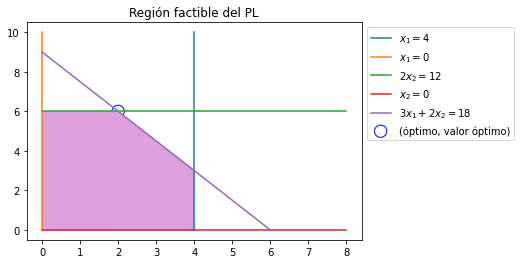

In [2]:
#x_1 ≤ 4

point1_x_1 = (4,0)

point2_x_1 = (4, 10)

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = (0,0)

point4_x_1 = (0, 10)

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = (0, 6)

point2_x_2 = (8, 6)

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = (0, 0)

point4_x_2 = (8, 0)

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x_1_region_1 = np.linspace(0,4, 100)

x_2_region_1 = 1/2*(18 - 3*x_1_region_1)


x_1 = np.linspace(0,6, 100)

x_2 = 1/2*(18 - 3*x_1)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)
plt.scatter(2, 6, marker='o', s=150,
            facecolors='none', edgecolors='b')
plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$", "(óptimo, valor óptimo)"], bbox_to_anchor=(1, 1))

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
x_1_region_2 = np.linspace(0,2, 100)
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


```{admonition} Definición

Asociado a todo problema de programación lineal existe otro problema lineal con nombre **dual**. Al problema "original" se le nombra **primal**.

```

```{admonition} Observación
:class: tip

Realmente no importa a cuál de los problemas se le dé el nombre primal y a cuál el de dual. La convención es que el modelo que se formula para representar el problema real recibe el nombre de problema primal no importando la forma que tiene (estándar u otra).

```

El problema **primal** anterior escrito en notación vectorial y matricial es:

$$\displaystyle \max_{x \in \mathbb{R}^2} (-c)^Tx$$

$$\text{sujeto a: }$$

$$Ax \leq b$$

$$x \geq 0$$

donde: $
A= 
\left [
\begin{array}{cc}
1 & 0 \\
0 & 2 \\
3 & 2 \\
\end{array}
\right ], x=
\left [
\begin{array}{c}
x_1 \\
x_2 \\
\end{array}
\right ], b=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]$ y 
$c = \left [ \begin{array}{c} -3 \\ -5 \end{array}\right]$ representa al vector de costos unitarios o equivalentemente $-c$ el vector de ganancias unitarias. La última desigualdad se refiere a que todas las componentes del vector $x$ son mayores o iguales a cero. El PL busca maximizar $f_o(x) = -c^Tx$, la ganancia total.

```{margin}
$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 \\
\text{sujeto a: }       \\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$
```

```{admonition} Comentario

En el contexto del PL ejemplo se tiene:

$f_o$: ganancia total debida a todas las actividades (función objetivo). En el ejemplo es la ganancia semanal total (en miles de pesos) que generan los productos $1$ y $2$.

$x_j$: nivel de la actividad $j$ con $j=1, 2, \dots, n$ (variables de optimización primales). En el ejemplo $n=2$. $x_1$ es el número de lotes del producto $1$ que se fabrican por semana (análogamente $x_2$).

$c_j$: costo unitario debido a la actividad j con $j=1, 2, \dots, n$ ($-c_j$ es la ganancia unitaria).

$b_i$: cantidad disponible del recurso $i$ para asignarse a las actividades con $i=1, 2, \dots, m$. En el ejemplo $m=3$. $b_1=4$ representa el número de horas de producción disponibles por semana en la planta $1$ para fabricar los lotes de los productos $1$ y $2$.

$a_{ij}$: cantidad del recurso $i$ consumido por cada unidad de la actividad $j$ con $i=1, 2, \dots n$, $j=1, 2, \dots m$. En el ejemplo se consumen $3$ horas para producir el producto $1$ y $2$ horas para el $2$ de las $18$ horas disponibles en la planta $3$.

```

El problema **dual** asociado al problema anterior es:

```{margin}

Por ahora tómese como válida la expresión del problema dual, en esta primera parte se busca señalar las relaciones existentes con el problema primal y no la forma matemática de obtenerlo.

```

$$\displaystyle \min_{\lambda \in \mathbb{R}^3} (-\lambda)^T b$$

$$\text{sujeto a: }$$

$$A^T(-\lambda) \geq -c$$

$$-\lambda \geq 0$$

Que escrito con escalares es:

$$\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3$$

$$\text{sujeto a: }$$

$$-\lambda_1 -3 \lambda_3 \geq 3$$

$$-2 \lambda_2 - 2 \lambda_3 \geq 5$$

$$-\lambda_1 \geq 0, -\lambda_2 \geq 0, -\lambda_3 \geq 0$$

```{margin}
$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2       \\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$
```

```{margin}

$
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 \geq 3\\
-2 \lambda_2 - 2 \lambda_3 \geq 5 \\
-\lambda_1 \geq 0 \\
-\lambda_2 \geq 0 \\
-\lambda_3 \geq 0
$
```

```{admonition} Comentarios

* El problema dual usa exactamente los mismos parámetros del problema primal pero en diferentes lugares:

    * Los coeficientes de la función objetivo del problema primal son los lados derechos de las restricciones funcionales del problema dual.
    
    * Los lados derechos de las restricciones funcionales del problema primal son los coeficientes de la función objetivo del problema dual.
    
    * Los coeficientes de una variable de las restricciones funcionales del problema primal son los coeficientes de una restricción funcional del problema dual. Por ejemplo: de las restricciones funcionales $x_1 \leq 4$, $2x_2 \leq 12$ y $3x_1 + 2x_2 \leq 18$ del problema primal los coeficientes de $x_1$ son $1, 0, 3$ respectivamente, en el problema dual se tienen estos mismos coeficientes para la restricción funcional:$-\lambda_1 -3 \lambda_3 \geq 3$ (recuérdese que la variable del problema dual en su forma no estándar es $-\lambda$). 


```

## Interpretación del problema dual

Considérese las siguientes formas de los modelos de optimización primal-dual para el problema del inicio:

$$\begin{align*}
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 
&& &&
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: }       && &&  \text{sujeto a: }\\
x_1 \leq 4 \nonumber    && &&  -\lambda_1 -3 \lambda_3 \geq 3\\
2x_2 \leq 12            && && -2 \lambda_2 - 2 \lambda_3 \geq 5 \\
3x_1 + 2x_2 \leq 18     && && -\lambda_1 \geq 0 \\
x_1 \geq 0              && && -\lambda_2 \geq 0 \\
x_2 \geq 0              && && -\lambda_3 \geq 0
\end{align*}$$

```{admonition} Observación
:class: tip

Para la interpretación del problema dual en esta primera parte no utilizamos una forma estándar del mismo.

```

```{margin}

La forma aumentada del problema primal recuérdese es:

$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$
```


Recordemos algunos resultados que obtuvimos en el {ref}`ejemplo del método gráfico <EJMETGRAFICOPL>` y en el {ref}`ejemplo del método símplex <EJMETSIMPLEX>` para el problema primal en su forma **aumentada**:

* La solución óptima (no aumentada) es $x^* = \left [ \begin{array}{c} 2 \\ 6\end{array} \right ]$ con valor de la función objetivo $f_o(x) = (-c)^Tx^* = 36$.


* La relación entre $f_o(x)$ y el vector $\nu$ en el método símplex es: $f_o(x) = - \nu^Tb$. **Sin embargo** recuérdese que el vector $\nu$ surgió por el uso de la función Lagraniana para restricciones de igualdad en la forma aumentada.

```{margin}

Recuérdese que los multiplicadores de Lagrange $\nu, \lambda$ se asocian a igualdades y desigualdades respectivamente, ver {ref}`la función Lagrangiana <FUNLAGRANGIANA>`.

```

* En esta sección consideramos una forma del PL **no estándar, pues sólo tiene desigualdades**. Por tanto sólo tenemos al multiplicador $\lambda$. Entonces se cumple que **no** tenemos vector $\nu$ y más bien $\lambda$ es el **único** vector multiplicador de Lagrange que tenemos y se cumple: $f_o(x) = (- \lambda) ^Tb$.

* Para la forma aumentada del PL se obtuvo que el valor del vector óptimo $\nu$ es: $\nu^* = \left [ \begin{array}{c} 0 \\ -1.5 \\ -1 \end{array} \right ]$ y por el punto anterior: $\lambda^* = \left [ \begin{array}{c} 0 \\ -1.5 \\ -1 \end{array} \right ]$.

* El valor óptimo de la función objetivo entonces se puede calcular a partir de $\lambda^*$: $f_o(x) = (-\lambda^*)^Tb = -[0 \quad -1.5 \quad -1] \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array} \right ] = - (-36) = 36$.

La interpretación del problema dual podemos realizarla por partes, siendo las primeras las relacionadas con la función objetivo de éste: $-(\lambda)^Tb$ y su variable de optimización: $-\lambda$.


### Función objetivo y variable de optimización del problema dual

La función objetivo del problema dual es:

$$-\lambda^T b = b_1(-\lambda_1) + b_2(-\lambda_2) + \dots + b_m(-\lambda_m)$$

con $b_i$ $i$-ésima componente del vector $b$ que representa al recurso $i=1, 2, \dots, m$. 


```{margin}

$
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 \geq 3\\
-2 \lambda_2 - 2 \lambda_3 \geq 5 \\
-\lambda_1 \geq 0 \\
-\lambda_2 \geq 0 \\
-\lambda_3 \geq 0
$
```

Como se vio arriba en el método símplex los valores de las funciones objetivo de cada problema son iguales de modo que cada término $b_i (-\lambda_i)$ puede interpretarse como la contribución a la ganancia por consumir $b_i$ unidades del recurso $i$ en el problema primal.

Así, la variable de optimización $-\lambda_i$ se interpreta como la contribución a la ganancia por unidad del recurso $i$ y minimizar $-\lambda^T b$ es minimizar el valor total de los recursos consumidos por las actividades. En el ejemplo los recursos recuérdese que son el número de horas de producción disponibles por semana en las plantas para producir los productos $1$ y $2$.

```{admonition} Comentario

En Economía se nombra al vector $-\lambda^*$ [shadow prices](https://en.wikipedia.org/wiki/Shadow_price). Sus componentes indican que un incremento individual de una unidad en cualquier $b_i$ aumentará en $-\lambda_i^*$ el valor óptimo de la función objetivo (ganancia total semanal en miles de pesos).

```

```{margin}
$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2       \\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$
```

```{margin}

$
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 \geq 3\\
-2 \lambda_2 - 2 \lambda_3 \geq 5 \\
-\lambda_1 \geq 0 \\
-\lambda_2 \geq 0 \\
-\lambda_3 \geq 0
$
```

### Lados izquierdos de las restricciones funcionales

En el problema primal la cantidad de recurso $i$ consumido por cada unidad de la actividad $j$ está dado por $a_{ij}$. Se vio que la variable $-\lambda_i$ en el problema dual es la contribución a la ganancia por unidad consumida del recurso $i$. Por esto, la suma $\displaystyle \sum_{i=1}^m a_{ij} (-\lambda_i)$ se interpreta como la contribución a la ganancia de la **mezcla de recursos** $\displaystyle \sum_{i=1}^m a_{ij} (-\lambda_i)$ que se consumiría si se usara una unidad de la actividad $j$ con $i=1, 2, \dots, m$, $j=1, 2, \dots, n$.

En el ejemplo, una unidad de la actividad $j$ corresponde a producir $1$ lote del producto $j$ por semana, $j=1, 2$. La mezcla de recursos consumida al producir $1$ lote del producto $1$ es $1$ hora de producción de la planta $1$ y $3$ horas de la planta $3$: $1(-\lambda_1) + 3(-\lambda_3) \geq 3$ que es el lado izquierdo de la primera restricción funcional del problema dual. La mezcla correspondiente por lote del producto $2$ es $2$ horas de cada una de las plantas $2$ y $3$: $2(-\lambda_2) + 2(-\lambda_3) \geq 5$. Los lados izquierdos de las restricciones funcionales en el problema dual son las contribuciones a la ganancia en miles de pesos de estas mezclas de recursos por lote producido por semana de los productos respectivos.

```{margin}
$
\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2       \\
x_1 \leq 4 \nonumber    \\
2x_2 \leq 12            \\
3x_1 + 2x_2 \leq 18     \\
x_1 \geq 0              \\
x_2 \geq 0              \\
$
```

```{margin}

$
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3\\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 \geq 3\\
-2 \lambda_2 - 2 \lambda_3 \geq 5 \\
-\lambda_1 \geq 0 \\
-\lambda_2 \geq 0 \\
-\lambda_3 \geq 0
$
```

## Restricciones funcionales y de no negatividad

El valor $-c_j$ es la ganancia unitaria que se obtiene por la actividad $j$ por lo que $\displaystyle \sum_{i=1}^m a_{ij}(-\lambda_i) \geq c_j$ indica que la contribución a la ganancia de la mezcla de recursos debe ser, por lo menos, tan grande como si $1$ unidad de la actividad $j$ la utilizara para $j=1, 2, \dots, n$.


En el ejemplo, las ganancias unitarias (en miles de pesos por semana) son $-c_1 = 3$ y $-c_2 = 5$ por la producción del producto $1$ y $2$ respectivamente. La restricción funcional $-\lambda_1 -3\lambda_3 \geq 3$ entonces indica que la producción del producto $1$ en la planta $1$ y $3$ debe ser al menos tan redituable que la ganancia que se obtiene por el producto $1$: $3$ mil pesos.

La restricción $-\lambda_i$ indica que la contribución a la ganancia por el recurso $i$, $i=1,2, \dots, m$ debe ser no negativa. De lo contrario sería mejor no utilizar este recurso.

## Relaciones entre el problema primal y el problema dual

### Forma aumentada del problema dual

El problema dual es un problema PL por lo que también tiene soluciones en un vértice que pueden ser factibles (FEV) o no factibles (NFEV), ver {ref}`soluciones FEV y NFEV <SOLFEVNFEV>`. También tiene una forma aumentada y por tanto tiene soluciones básicas factibles (BF) o no factibles (NBF), ver {ref}`forma aumentada de un PL <FORMAAUMENTADAPL>`. Para el ejemplo prototipo la forma aumentada es:

$$\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3$$

$$\text{sujeto a: }$$

$$-\lambda_1 -3 \lambda_3 + \lambda_4 = 3$$

$$-2 \lambda_2 - 2 \lambda_3 + \lambda_5 = 5$$

$$-\lambda_1 \geq 0, -\lambda_2 \geq 0, -\lambda_3 \geq 0, -\lambda_4 \geq 0, -\lambda_5 \geq 0$$

De aquí en adelante consideraremos la forma aumentada de ambos problemas por lo que $x \in \mathbb{R}^5$, $\lambda \in \mathbb{R}^5$.

```{admonition} Comentario

Las variables $-\lambda_4, -\lambda_5$ son variables consideradas de **superávit**, ***surplus variables***, (obsérvese la diferencia con las variables de holgura).

```

```{margin}

Forma estándar de un PL:

$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx\\
\text{sujeto a:} \\
Ax=b\\
x \geq 0
$
```

```{admonition} Observación
:class: tip

Obsérvese que en este ejemplo la forma aumentada del dual corresponde a la forma estándar de los PL.

```

### Variables básicas y no básicas del problema dual

Con la analogía anterior podemos aplicar el método símplex al problema dual con lo que se tendrán variables básicas y no básicas. En cada iteración el método símplex designará $n$ variables básicas y $m$ variables no básicas. 

```{admonition} Comentario

Recuérdese que al aplicar el método símplex al problema primal se desginó $m$ variables básicas y $n$ variables no básicas. Se verá que "están volteadas" en uno y otro problema las variables básicas y no básicas.

```

A continuación se presenta una tabla para el ejemplo prototipo en la que cada renglón representa una solución básica del problema primal y en el margen se puede relacionar cada solución básica (BF o NBF) con las primeras dos coordenadas con los puntos en la gráfica. En la última columna se presenta el valor de la función objetivo del problema primal:

```{margin}

La forma aumentada del problema primal recuérdese es:

$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$
```


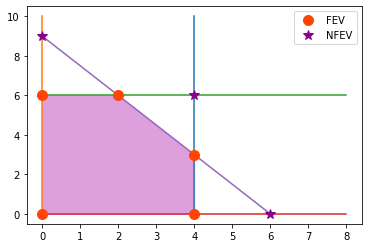

In [3]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")


ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")


point_FEV_1 = (0,0)
point_FEV_2 = (0,6)  
point_FEV_3 = (2,6) 
point_FEV_4 = (4,3) 
point_FEV_5 = (4,0)


array_FEV = np.row_stack((point_FEV_1,
                          point_FEV_2,
                          point_FEV_3,
                          point_FEV_4,
                          point_FEV_5))

point_NFEV_1 = (0, 9)
point_NFEV_2 = (4, 6)
point_NFEV_3 = (6, 0)

array_NFEV = np.row_stack((point_NFEV_1,
                           point_NFEV_2,
                           point_NFEV_3))


ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

|Renglón|Solución Básica $(x_1, x_2, x_3, x_4, x_5)^T$| ¿Factible?| Valor $f_o$|
|:---:|:---:|:---:|:---:|
|1|(0, 0, 4, 12, 18)|Sí|0|
|2|(4, 0, 0, 12, 6)|Sí|12|
|3|(6, 0, -2, 12, 0)|No|18|
|4|(4, 3, 0, 6, 0)|Sí|27|
|5|(0, 6, 4, 0, 6)|Sí|30|
|6|(2, 6, 2, 0, 0)|Sí|36|
|7|(4, 6, 0, 0, -6)|No|42|
|8|(0,9,4,-6,0)|No|45|

Por ejemplo para el renglón $7$ el valor de $f_o$ es: $-c^Tx = -[-3 \quad -5 \quad 0 \quad 0 \quad 0] \left [\begin{array}{c}4 \\ 6 \\ 0 \\ 0 \\ -6\end{array}\right ] = 42$.

### Relación 1

Las soluciones básicas del problema primal corresponden con soluciones básicas del problema dual.

```{margin}

En el ejemplo se tenía la relación $\nu = B^{-T} c_B$ pero como estamos trabajando directamente con la forma aumentada del problema dual sólo tenemos vector $\lambda$.

```

Las soluciones básicas del problema dual las podemos obtener a partir de la tabla anterior y la ecuación establecida en el {ref}`ejemplo del método símplex <EJMETSIMPLEX>`: $\lambda = B^{-T} c_B$. Además para este ejemplo **no tenemos variables básicas degeneradas** por lo que podemos realizar lo siguiente. 

Obtendremos las soluciones básicas del problema dual por renglones. 


Para el primer renglón recordamos que se utilizan a las variables $x_3, x_4, x_5$ como básicas y $x_1, x_2$ como no básicas (son iguales a cero). También recordamos que $B$ es la matriz identidad y el vector de costos es $c_B = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right ]$ entonces $\lambda[1:3] = B^{-T}c_B = 0$, donde $\lambda[1:3]$ es el vector de la posición $1$ a $3$ de $\lambda$ que contiene a las variables $\lambda_1, \lambda_2, \lambda_3$. Esto es: $\lambda_1 = \lambda_2 = \lambda_3 = 0$. Para $\lambda_4$ y $\lambda_5$ tenemos dos opciones. La primera es resolver el sistema de ecuaciones lineales del problema dual en su forma aumentada con los valores ya calculados:



```{margin}

El problema dual en su forma aumentada recuérdese es:

$
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3 \\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 + \lambda_4 = 3 \\
-2 \lambda_2 - 2 \lambda_3 + \lambda_5 = 5 \\
-\lambda_1 \geq 0, -\lambda_2 \geq 0, -\lambda_3 \geq 0, -\lambda_4 \geq 0, -\lambda_5 \geq 0 \\
$

```

$$
\begin{eqnarray}
-\lambda_1 -3 \lambda_3 + \lambda_4 = 3 \nonumber \\
-2 \lambda_2 - 2 \lambda_3 + \lambda_5 = 5 \nonumber\\
\end{eqnarray}
$$

In [4]:
lambda_B = np.array([0,0,0])

In [5]:
import sympy

In [6]:
lambda_1, lambda_2, lambda_3, lambda_4, lambda_5 = sympy.symbols("lambda_1, lambda_2, lambda_3, lambda_4, lambda_5")

```{margin}

Definimos con `SymPy` la ecuación $-\lambda_1 -3 \lambda_3 + \lambda_4 - 3 = 0$

```

In [7]:
eq1 = -lambda_1 -3*lambda_3 + lambda_4 - 3

```{margin}

Definimos con `SymPy` la ecuación $-2 \lambda_2 - 2 \lambda_3 + \lambda_5 -5 = 0$

```

In [8]:
eq2 = -2*lambda_2 -2*lambda_3 +lambda_5 - 5

```{margin}

Sustituimos los valores calculados del vector $\lambda[1:3]$.

```

In [9]:
sympy.pprint(eq1.subs({lambda_1: lambda_B[0],
                       lambda_2: lambda_B[1],
                       lambda_3: lambda_B[2]
                      }))

λ₄ - 3


Por tanto $\lambda_4 = 3$.

```{margin}

Sustituimos los valores calculados del vector $\lambda[1:3]$.

```

In [10]:
sympy.pprint(eq2.subs({lambda_1: lambda_B[0],
                       lambda_2: lambda_B[1],
                       lambda_3: lambda_B[2]
                      }))

λ₅ - 5


Por tanto $\lambda_5 = 5$ y $\lambda = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \\ 3 \\ 5 \end{array} \right ]$. La otra opción para calcular $\lambda_4, \lambda_5$ es con la relación:

$$\lambda_{N_j} = -c_{N_j} + \lambda[1:3]^Ta_j, \quad j \in \mathcal{N}$$

```{margin}

La forma aumentada del problema primal recuérdese es:

$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$
```


donde: $\mathcal{N}$ es el conjunto de índices no básicos **inicial**, $\lambda[1:3]$ es el vector de la posición $1$ a $3$ de $\lambda$ que contiene a las variables $\lambda_1, \lambda_2, \lambda_3$ y $a_j$ es la $j$-ésima columna de $A$. $A$ es la matriz del sistema de ecuaciones lineales del problema primal:

$$A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right]
$$

In [11]:
#list of indexes of nonbasic variables correspond to x1, x2
N_list_idx = [0, 1]
A = np.array([[1, 0, 1, 0, 0],
              [0, 2, 0, 1, 0],
              [3, 2, 0, 0, 1]])

El valor de $\lambda_4$ es:

In [12]:
c_N = np.array([-3, -5])

In [13]:
print(-c_N[N_list_idx[0]] + np.dot(lambda_B, A[:,N_list_idx[0]]))

3


El valor de $\lambda_5$ es:

In [14]:
print(-c_N[N_list_idx[1]] + np.dot(lambda_B, A[:,N_list_idx[1]]))

5


```{margin}

La forma aumentada del problema primal recuérdese es:

$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$
```


Para los siguientes renglones como en todas las soluciones básicas de la tabla los valores iguales a cero corresponden a variables no básicas (pues no tenemos variables básicas degeneradas) podemos intercambiar columnas de la matriz $B$ inicial (identidad) con columnas de la matriz $A$ del sistema de ecuaciones lineales del problema primal de la forma aumentada. También tal intercambio lo hacemos para el vector $c_B$ con $c_N$:

$$
A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ], B = 
\left [
\begin{array}{ccc}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ], c_B=\left [ \begin{array}{c}0 \\ 0 \\ 0\end{array}\right ], c_N = \left [ \begin{array}{c} -3 \\ -5 \\ \end{array} \right ]
$$

Entonces el renglón número $2$ de la tabla anterior corresponde a un intercambio entre la primera columna de $B$ con la primer columna de $A$ y realizando este mismo intercambio entre $c_B$ y $c_N$ se tiene:

$$
B = \left [ 
\begin{array}{ccc} 
1 & 0 & 0 \\ 
0 & 1 & 0 \\ 
3 & 0 & 1 
\end{array} \right ], c_B = \left [ \begin{array}{c}-3 \\ 0 \\ 0\end{array}\right ]
$$

In [15]:
B = np.eye(3)
c_B = np.array([0, 0, 0])
c_N = np.array([-3, -5])

In [16]:
#ordered list of indexes of A that will be interchanged
list_idx_A = [0]
#ordered list of indexes of B that will be interchanged
list_idx_B = [0]

In [17]:
B[:,list_idx_B] = A[:,list_idx_A]

In [18]:
c_B[list_idx_B] = c_N[list_idx_A]

In [19]:
c_B

array([-3,  0,  0])

In [20]:
lambda_B = np.linalg.solve(B.T, c_B)

In [21]:
lambda_B

array([-3.,  0.,  0.])

```{margin}

El problema dual estándar recuérdese es:

$
\displaystyle \min_{\lambda \in \mathbb{R}^3} -4\lambda_1 -12 \lambda_2 -18 \lambda_3 \\
\text{sujeto a: } \\
-\lambda_1 -3 \lambda_3 + \lambda_4 = 3 \\
-2 \lambda_2 - 2 \lambda_3 + \lambda_5 = 5 \\
-\lambda_1 \geq 0, -\lambda_2 \geq 0, -\lambda_3 \geq 0, -\lambda_4 \geq 0, -\lambda_5 \geq 0 \\
$

```

Los otros dos valores del vector $\lambda$ lo podemos calcular sustituyendo en el sistema de ecuaciones lineales del problema dual en su forma estándar los valores $\lambda_1, \lambda_2, \lambda_3$ anteriores:

In [22]:
sympy.pprint(eq1.subs({lambda_1: lambda_B[0],
                       lambda_2: lambda_B[1],
                       lambda_3: lambda_B[2]
                      }))

λ₄


Por tanto $\lambda_4 = 0$.

In [23]:
sympy.pprint(eq2.subs({lambda_1: lambda_B[0],
                       lambda_2: lambda_B[1],
                       lambda_3: lambda_B[2]
                      }))

λ₅ - 5


Por tanto $\lambda_5 = 5$.

Entonces: $\lambda = \left [ \begin{array}{c} -3 \\ 0 \\ 0 \\ 0 \\ 5 \end{array} \right ]$

In [24]:
#list of indexes of nonbasic variables correspond to x1, x2
N_list_idx = [0, 1]

El valor de $\lambda_4$ es:

In [25]:
print(-c_N[N_list_idx[0]] + np.dot(lambda_B, A[:,N_list_idx[0]]))

0.0


El valor de $\lambda_5$ es:

In [26]:
print(-c_N[N_list_idx[1]] + np.dot(lambda_B, A[:,N_list_idx[1]]))

5.0


Realizando lo anterior para cada renglón anterior obtenemos:

|Renglón|Solución Básica $(\lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5)^T$| ¿Factible?| Valor $f_o$|
|:---:|:---:|:---:|:---:|
|1|(0, 0, 0, 3, 5)|No|0|
|2|(-3, 0, 0, 0, 5)|No|12|
|3|(0, 0, -1, 0, 3)|No|18|
|4|(4.5, 0 , -2.5, 0, 0)|No|27|
|5|(0, -2.5, 0, 3, 0)|No|30|
|6|(0, -1.5, -1, 0, 0)|Sí|36|
|7|(-3, -1.5, 0, 0, 0)|Sí|42|
|8|(0, 0, -2.5, -4.5,0)|Sí|45|

```{admonition} Ejercicio
:class: tip

Obtener las soluciones básicas de la tabla anterior a partir de las soluciones básicas del problema primal.

```

* Las únicas soluciones factibles para el problema dual son aquellas que satisfacen la condición de optimalidad del problema primal.

* 

* -


En el problema de inicio: Sólo la solución óptima para el problema primal corresponde a la solución factible del problema dual.

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

2. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.

3. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.
